In [34]:
import pandas as pd
import pickle

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Eliminadas las columnas: 
- Registro
- Temperatura
- fecha


In [35]:
df = pd.read_csv("../data/02_registrados_limpio.csv", index_col = 0)

In [36]:
df.head()

,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,sensacion_termica,humedad,viento,registrados
0,2018-01-01,winter,0,1,1,1,NO,2,18.18125,80.5833,10.749882,654
1,2018-01-02,winter,0,1,0,2,SI,2,17.68695,69.6087,16.652113,670
2,2018-01-03,winter,0,1,0,3,SI,1,9.47025,43.7273,16.636703,1229
3,2018-01-04,winter,0,1,0,4,SI,1,10.60610,59.0435,10.739832,1454
4,2018-01-05,winter,0,1,0,5,SI,1,11.46350,43.6957,12.522300,1518


categoria inici final mes
mes cambiar numero para dar mas o menos peso 



In [37]:
df.columns

Index(['fecha', 'estacion', 'año', 'mes', 'vacaciones', 'dia_semana',
       'laborable', 'clima', 'sensacion_termica', 'humedad', 'viento',
       'registrados'],
      dtype='object')

In [38]:
df_analisis = df.drop(['fecha','sensacion_termica', 'humedad', 'viento'], axis = 1)

In [39]:
df_analisis.head()

,estacion,año,mes,vacaciones,dia_semana,laborable,clima,registrados
0,winter,0,1,1,1,NO,2,654
1,winter,0,1,0,2,SI,2,670
2,winter,0,1,0,3,SI,1,1229
3,winter,0,1,0,4,SI,1,1454
4,winter,0,1,0,5,SI,1,1518


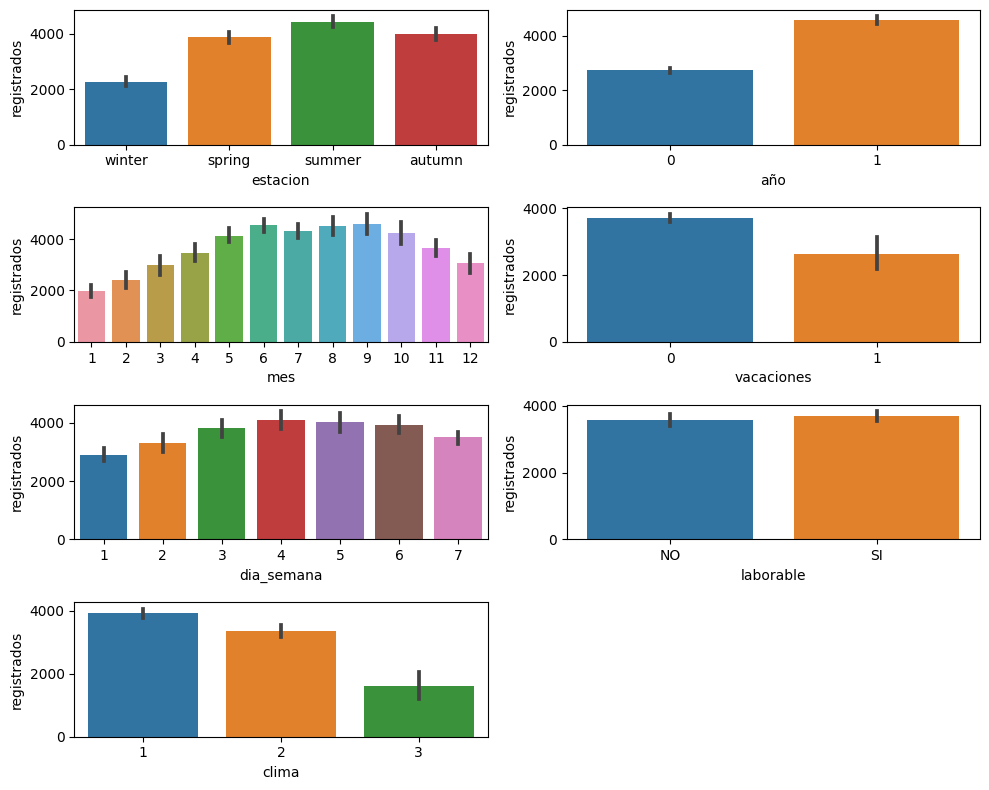

In [40]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10, 8))

axes=axes.flat #flat es para aplanar los ejes.
columnas_analisis=df_analisis.drop('registrados', axis = 1).columns

for i, col in enumerate(columnas_analisis):
  sns.barplot(data=df_analisis, x=col, y = 'registrados', ax=axes[i])

fig.delaxes(axes[-1])
fig.tight_layout()


### Valores encoding

Columna MesMapa4
- 5-6-7-8-9-10 = 2
- 11-12-4 = 1
- 1-2-3 = 0

Columna Estacion:
- Summer = 2
- spring - autumn = 1
- winter = 0

Columna dia_semana:
- 4-5-6 = 2
- 3-7 = 1
- 1-2 = 0

Columna clima:
- 3 = 0
- 2 = 1
- 1 = 2

Columna laborable:
- Sin orden - GetDummies

Columna vacaciones:
- 0 = 1
- 1 = 0

In [41]:
mapa_mes = {5:2, 6:2, 7:2, 8:2 ,9:2, 10:2,11:1, 12:1, 4:1, 1:0, 2:0, 3:0}
mapa_estacion = {"summer": 2, "spring":1, "autumn":1, "winter": 0}
mapa_dia_semana = {4: 2, 5:2, 6:2,3:1, 7:1, 1:0, 2:0}
mapa_clima = {3:0, 2:1, 1:2}
mapa_vacaciones = {0:1, 1:0}
mapa_laborable = {'SI':1, 'NO': 0}

In [42]:
df

,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,sensacion_termica,humedad,viento,registrados
0,2018-01-01,winter,0,1,1,1,NO,2,18.18125,80.5833,10.749882,654
1,2018-01-02,winter,0,1,0,2,SI,2,17.68695,69.6087,16.652113,670
2,2018-01-03,winter,0,1,0,3,SI,1,9.47025,43.7273,16.636703,1229
3,2018-01-04,winter,0,1,0,4,SI,1,10.60610,59.0435,10.739832,1454
4,2018-01-05,winter,0,1,0,5,SI,1,11.46350,43.6957,12.522300,1518
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,winter,1,12,0,5,SI,2,11.33210,65.2917,23.458911,1867
726,2019-12-28,winter,1,12,0,6,NO,2,12.75230,59.0000,10.416557,2451
727,2019-12-29,winter,1,12,0,7,NO,2,12.12000,75.2917,8.333661,1182
728,2019-12-30,winter,1,12,0,1,SI,1,11.58500,48.3333,23.500518,1432


In [43]:
df["mes_map"] = df["mes"].map(mapa_mes)
df["estacion_map"] = df["estacion"].map(mapa_estacion)
df["dia_semana_map"] = df["dia_semana"].map(mapa_dia_semana)
df["clima_map"] = df["clima"].map(mapa_clima)
df["vacaciones_map"] = df["vacaciones"].map(mapa_vacaciones)

In [44]:
dummies = pd.get_dummies(df["laborable"], prefix_sep = "_", prefix = "cod", dtype = int)
dummies.head(2)
#0 es no laborable

,cod_NO,cod_SI
0,1,0
1,0,1


In [45]:
dummies["cod_SI"].value_counts()

1    493
0    237
Name: cod_SI, dtype: int64

In [46]:
dummies.drop("cod_NO", axis=1, inplace=True)
dummies.rename(columns ={"cod_SI":'laborable_cod'}, inplace=True)
dummies.head()

,laborable_cod
0,0
1,1
2,1
3,1
4,1


In [47]:
df_cod = pd.concat([df, dummies], axis = 1)
df_cod.head(2)

,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,sensacion_termica,humedad,viento,registrados,mes_map,estacion_map,dia_semana_map,clima_map,vacaciones_map,laborable_cod
0,2018-01-01,winter,0,1,1,1,NO,2,18.18125,80.5833,10.749882,654,0,0,0,1,0,0
1,2018-01-02,winter,0,1,0,2,SI,2,17.68695,69.6087,16.652113,670,0,0,0,1,1,1


In [48]:
df_cod.drop(["fecha","estacion", "laborable", "mes", "vacaciones", "dia_semana", "clima"], axis=1, inplace=True)

In [49]:
df_cod.head(2)

,año,sensacion_termica,humedad,viento,registrados,mes_map,estacion_map,dia_semana_map,clima_map,vacaciones_map,laborable_cod
0,0,18.18125,80.5833,10.749882,654,0,0,0,1,0,0
1,0,17.68695,69.6087,16.652113,670,0,0,0,1,1,1


In [50]:
df_cod.to_csv("../data/03_registrados_cod.csv")

_____________

### Estandarización

In [51]:
scaler = StandardScaler()

In [52]:
df_scaler = df.copy()

In [53]:
df.columns

Index(['fecha', 'estacion', 'año', 'mes', 'vacaciones', 'dia_semana',
       'laborable', 'clima', 'sensacion_termica', 'humedad', 'viento',
       'registrados', 'mes_map', 'estacion_map', 'dia_semana_map', 'clima_map',
       'vacaciones_map'],
      dtype='object')

In [54]:
df_scaler.drop(['fecha', 'estacion', 'año', 'mes', 'vacaciones', 'dia_semana',
       'laborable', 'clima', 'registrados', 'mes_map', 'estacion_map', 'dia_semana_map', 'clima_map', "vacaciones_map"], axis = 1, inplace = True)

df_scaler.columns = df_scaler.columns + "_standar"

df_scaler.head(2)

,sensacion_termica_standar,humedad_standar,viento_standar
0,18.18125,80.5833,10.749882
1,17.68695,69.6087,16.652113


In [55]:
scaler.fit(df_scaler)

StandardScaler()

In [56]:
X_escaladas = scaler.transform(df_scaler)

In [57]:
df_scaler = pd.DataFrame(X_escaladas, columns= df_scaler.columns)

In [58]:
df_scaler.head(2)

,sensacion_termica_standar,humedad_standar,viento_standar
0,-0.680818,1.252343,-0.387833
1,-0.741507,0.480996,0.748899


In [59]:
df_standar_cod = pd.concat([df_cod, df_scaler], axis = 1)

In [60]:
df_standar_cod

,año,sensacion_termica,humedad,viento,registrados,mes_map,estacion_map,dia_semana_map,clima_map,vacaciones_map,laborable_cod,sensacion_termica_standar,humedad_standar,viento_standar
0,0,18.18125,80.5833,10.749882,654,0,0,0,1,0,0,-0.680818,1.252343,-0.387833
1,0,17.68695,69.6087,16.652113,670,0,0,0,1,1,1,-0.741507,0.480996,0.748899
2,0,9.47025,43.7273,16.636703,1229,0,0,1,2,1,1,-1.750344,-1.338073,0.745931
3,0,10.60610,59.0435,10.739832,1454,0,0,2,2,1,1,-1.610886,-0.261577,-0.389769
4,0,11.46350,43.6957,12.522300,1518,0,0,2,2,1,1,-1.505615,-1.340294,-0.046477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,11.33210,65.2917,23.458911,1867,1,0,2,1,1,1,-1.521749,0.177576,2.059845
726,1,12.75230,59.0000,10.416557,2451,1,0,2,1,1,0,-1.347378,-0.264634,-0.452029
727,1,12.12000,75.2917,8.333661,1182,1,0,1,1,1,0,-1.425011,0.880424,-0.853182
728,1,11.58500,48.3333,23.500518,1432,1,0,0,2,1,1,-1.490698,-1.014341,2.067858


In [61]:
df_standar_cod.isnull().sum()

año                          0
sensacion_termica            0
humedad                      0
viento                       0
registrados                  0
mes_map                      0
estacion_map                 0
dia_semana_map               0
clima_map                    0
vacaciones_map               0
laborable_cod                0
sensacion_termica_standar    0
humedad_standar              0
viento_standar               0
dtype: int64

In [62]:
df_standar_cod.drop(["sensacion_termica", "humedad", "viento"], axis=1, inplace=True)

In [64]:
df_standar_cod.head()

,año,registrados,mes_map,estacion_map,dia_semana_map,clima_map,vacaciones_map,laborable_cod,sensacion_termica_standar,humedad_standar,viento_standar
0,0,654,0,0,0,1,0,0,-0.680818,1.252343,-0.387833
1,0,670,0,0,0,1,1,1,-0.741507,0.480996,0.748899
2,0,1229,0,0,1,2,1,1,-1.750344,-1.338073,0.745931
3,0,1454,0,0,2,2,1,1,-1.610886,-0.261577,-0.389769
4,0,1518,0,0,2,2,1,1,-1.505615,-1.340294,-0.046477


In [63]:
df_standar_cod.to_csv("../data/04_registrados_cod_sta.csv")